In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
def generate_samples(distribution, params, n, size=1000):
    """
    Generate samples from a specified distribution.

    Args:
        distribution (str): Name of the distribution ('uniform', 'binomial', etc.).
        params (tuple): Parameters of the distribution.
        n (int): Sample size.
        size (int): Number of samples.

    Returns:
        np.ndarray: A 2D array where each row is a sample.
    """
    if distribution == 'uniform':
        return np.random.uniform(*params, size=(size, n))
    elif distribution == 'binomial':
        return np.random.binomial(*params, size=(size, n))
    elif distribution == 'poisson':
        return np.random.poisson(params[0], size=(size, n))
    elif distribution == 'exponential':
        return np.random.exponential(1 / params[0], size=(size, n))
    elif distribution == 'gamma':
        return np.random.gamma(*params, size=(size, n))
    elif distribution == 'beta':
        return np.random.beta(*params, size=(size, n))
    elif distribution == 'cauchy':
        return stats.cauchy.rvs(loc=params[0], scale=params[1], size=(size, n))
    elif distribution == 'normal':
        return np.random.normal(*params, size=(size, n))
    else:
        raise ValueError(f"Unknown distribution: {distribution}")


In [17]:
print(generate_samples('uniform', (0, 1), 10)[0])

[0.0389421  0.93238474 0.22407557 0.45726661 0.91944198 0.9714392
 0.96859762 0.63402055 0.22295426 0.6191791 ]


In [18]:
def compute_statistics(samples):
    """
    Compute sample statistics for a 2D array of samples.

    Args:
        samples (np.ndarray): 2D array where each row is a sample.

    Returns:
        dict: Dictionary of computed statistics (mean, median, etc.).
    """
    return {
        'mean': np.mean(samples, axis=1),
        'median': np.median(samples, axis=1),
        'std_dev': np.std(samples, axis=1),
        'min': np.min(samples, axis=1),
        'max': np.max(samples, axis=1),
        'iqr': np.percentile(samples, 75, axis=1) - np.percentile(samples, 25, axis=1),
    }


In [19]:
print(compute_statistics(generate_samples('uniform', (0, 1), 100,1)))  # params,sample_size,no.of samples

{'mean': array([0.50821638]), 'median': array([0.52716406]), 'std_dev': array([0.26688499]), 'min': array([0.03151356]), 'max': array([0.99963875]), 'iqr': array([0.39050236])}


In [20]:
def visualize_distribution(data, title):
    """
    Visualize sampling distributions using histograms, boxplots, and Q-Q plots.

    Args:
        data (np.ndarray): Array of a single sample statistic.
        title (str): Title for the plots.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histogram
    sns.histplot(data, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{title} - Histogram')

    # Boxplot
    sns.boxplot(data, ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{title} - Boxplot')

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title(f'{title} - Q-Q Plot')

    plt.tight_layout()
    plt.show()


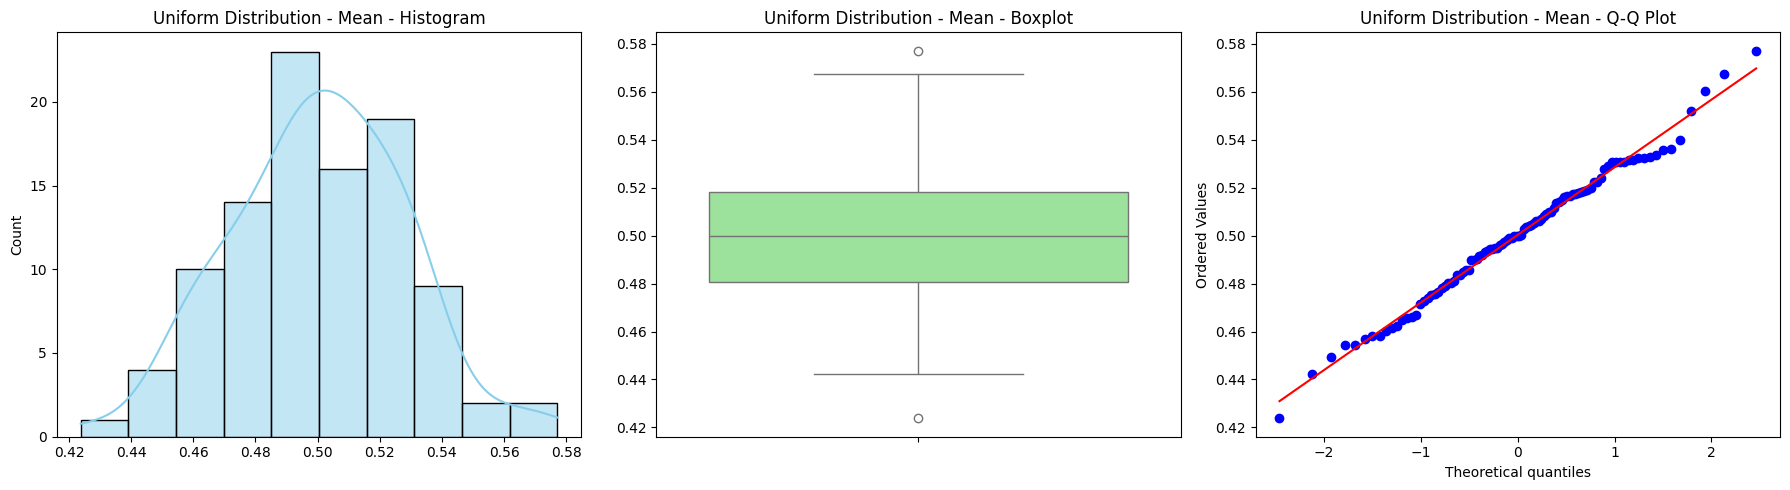

In [21]:
# Generate samples
samples = generate_samples('uniform', (0, 1), 100, 100)

# Compute statistics
statistics = compute_statistics(samples)

# Visualize the mean (or any other statistic)
visualize_distribution(statistics['mean'], "Uniform Distribution - Mean")


In [22]:
# def check_normality(data, alpha=0.05):
#     """
#     Perform Shapiro-Wilk test for normality.

#     Args:
#         data (np.ndarray): Array of a single sample statistic.
#         alpha (float): Significance level.

#     Returns:
#         str: Normality test result.
#     """
#     stat, p_value = stats.shapiro(data)
#     if p_value > alpha:
#         return f"Data is approximately normal (p={p_value:.3f})"
#     else:
#         return f"Data is NOT normal (p={p_value:.3f})"


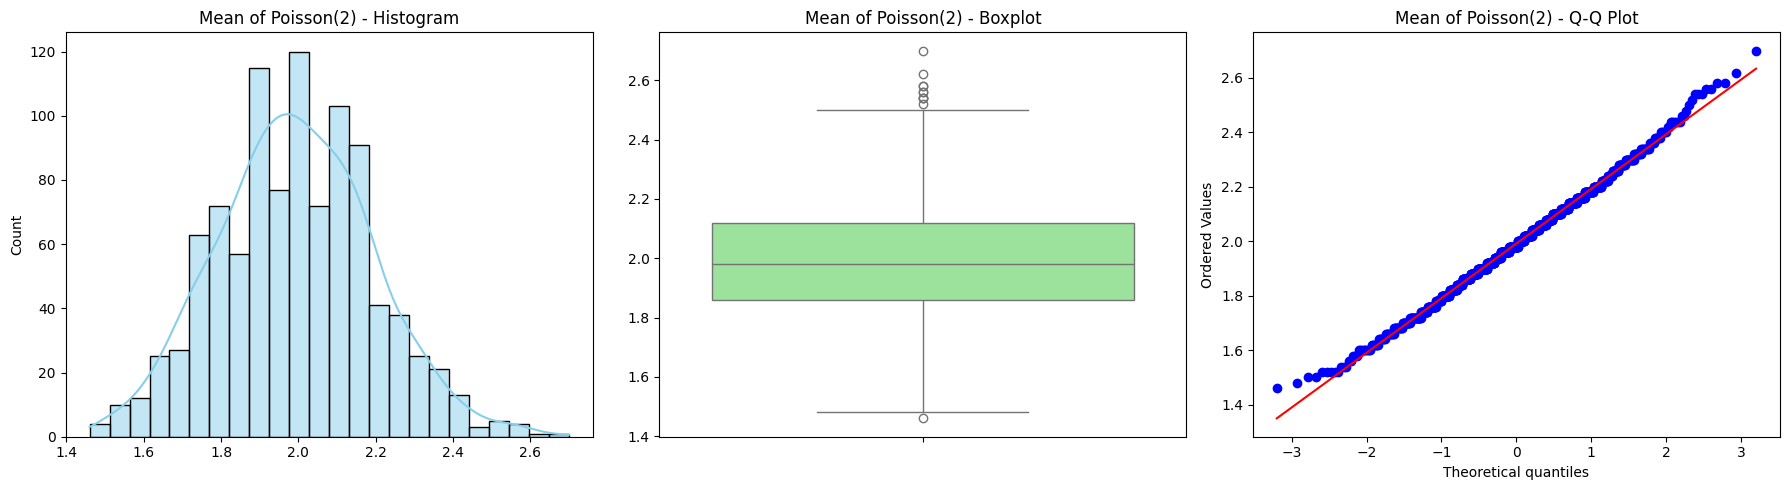

In [23]:
# Example: Poisson Distribution with lambda=2, n=30
n = 50
size = 1000
samples = generate_samples('poisson', (2,), n, size)
statistics = compute_statistics(samples)

# Visualize mean distribution
visualize_distribution(statistics['mean'], "Mean of Poisson(2)")

# # Test for normality
# result = check_normality(statistics['mean'])
# print(result)


Distribution: uniform, Parameters: (0, 1)


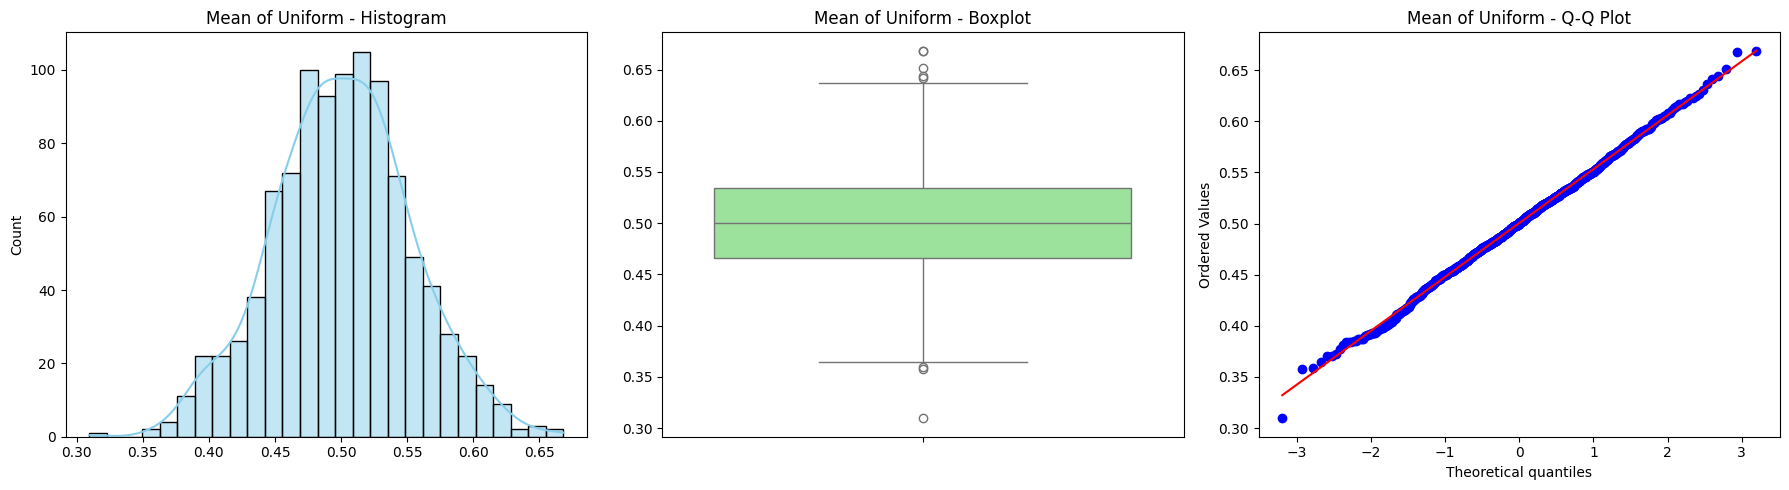

----------------------------------------
Distribution: binomial, Parameters: (12, 0.01)


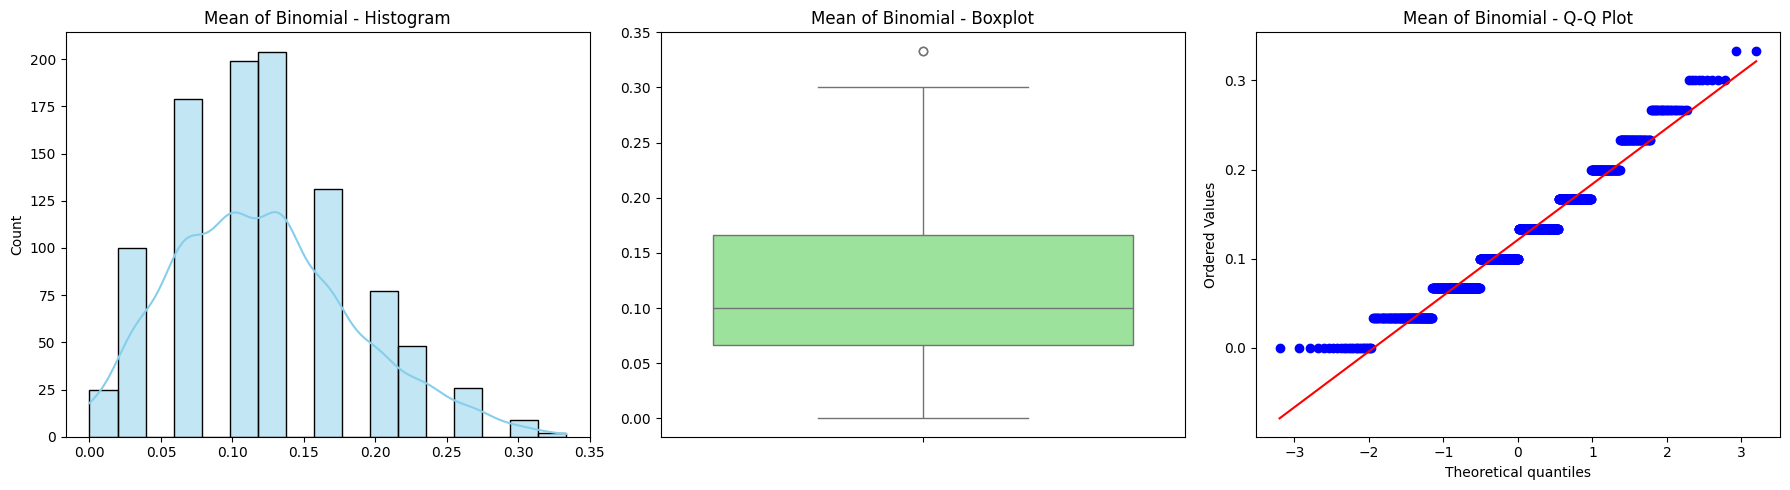

----------------------------------------
Distribution: binomial, Parameters: (20, 0.5)


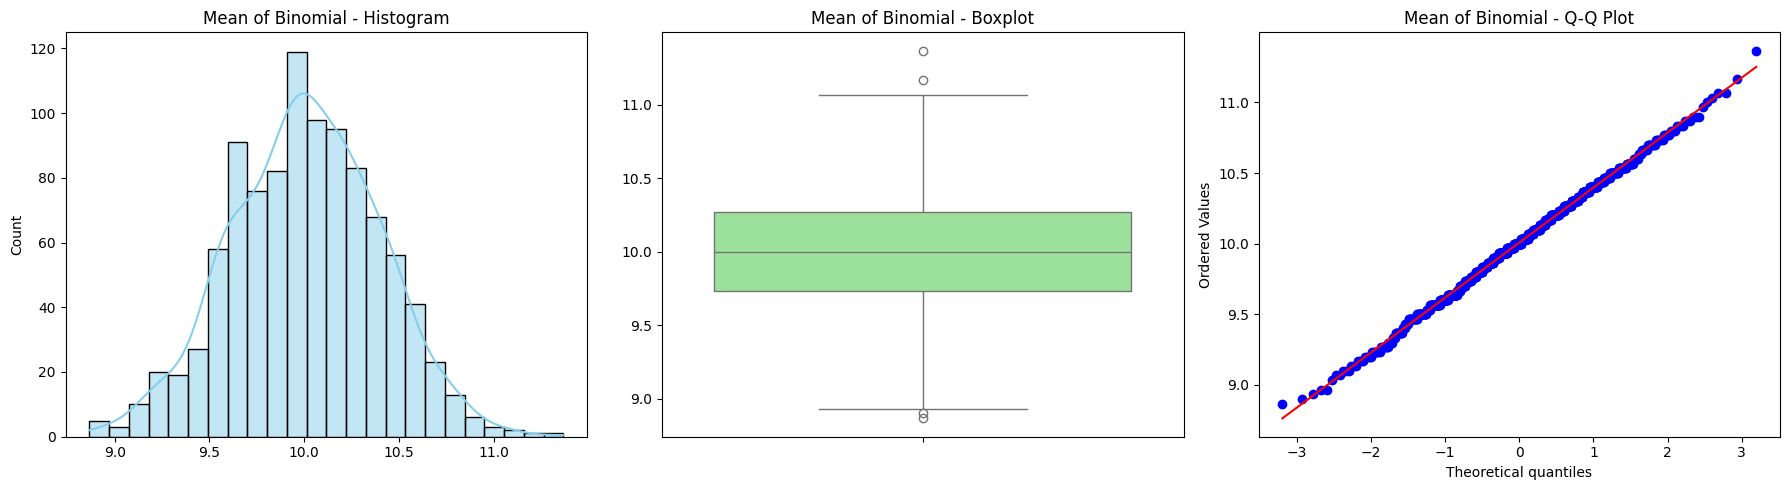

----------------------------------------
Distribution: binomial, Parameters: (18, 0.95)


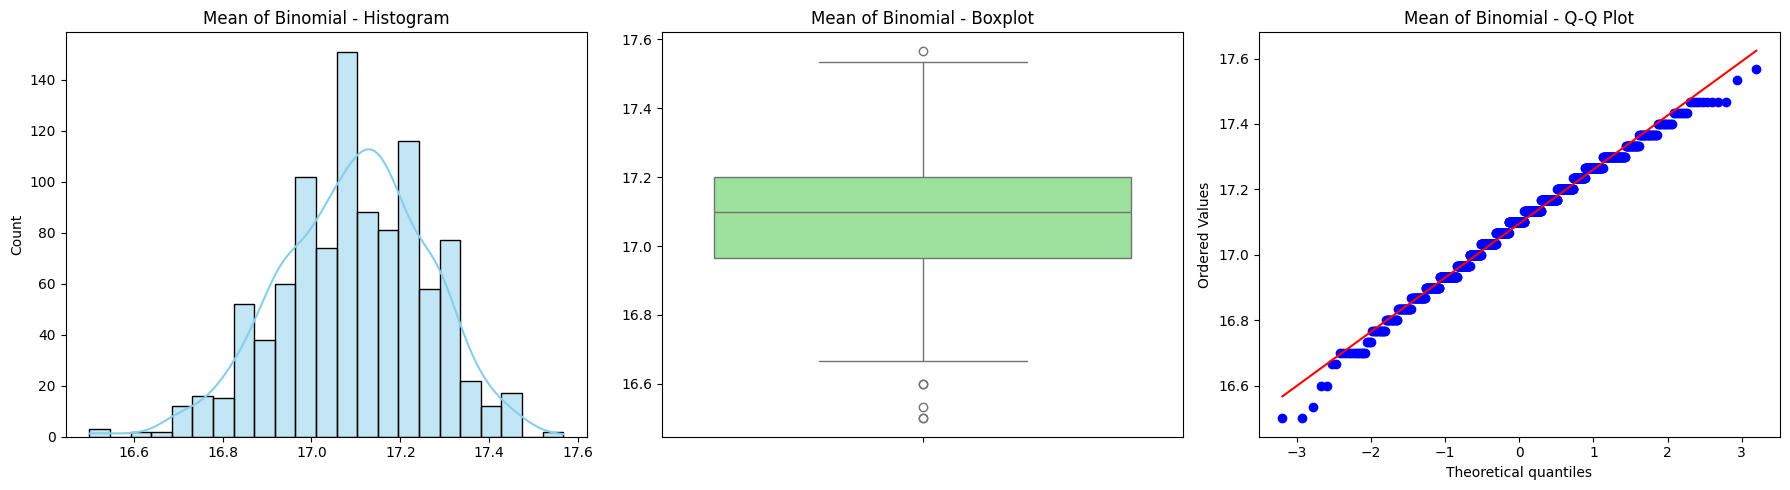

----------------------------------------
Distribution: poisson, Parameters: (0.001,)


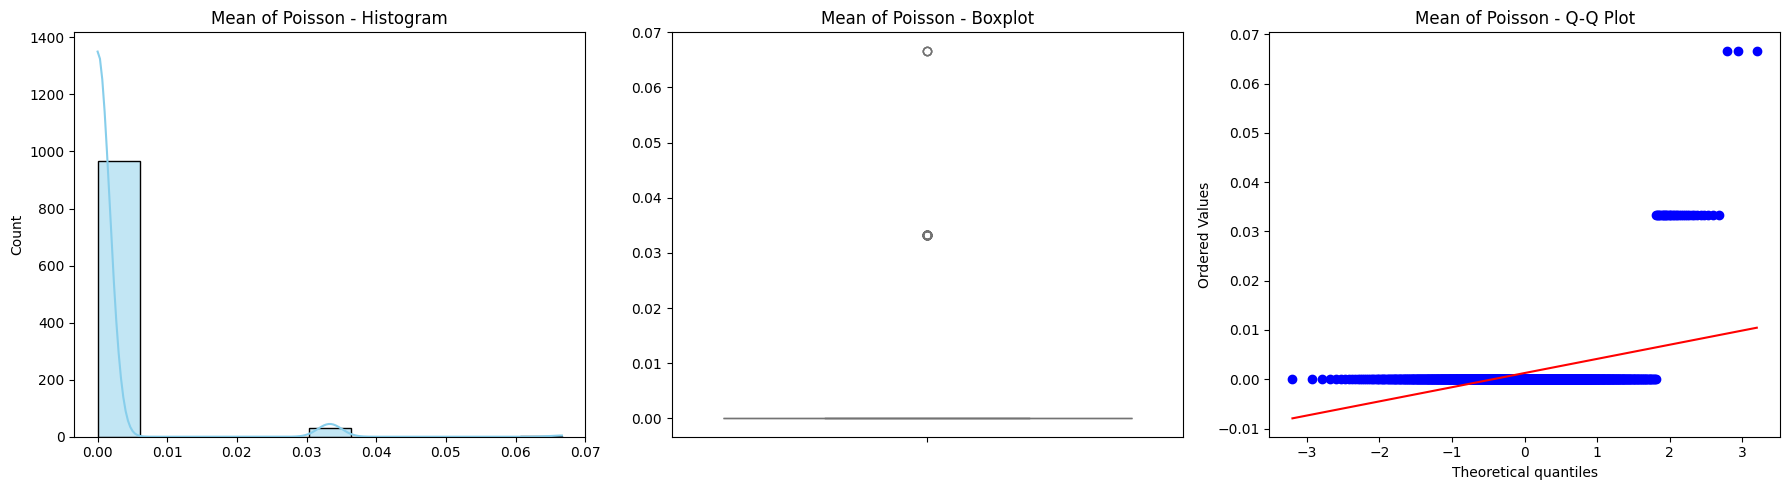

----------------------------------------
Distribution: poisson, Parameters: (1,)


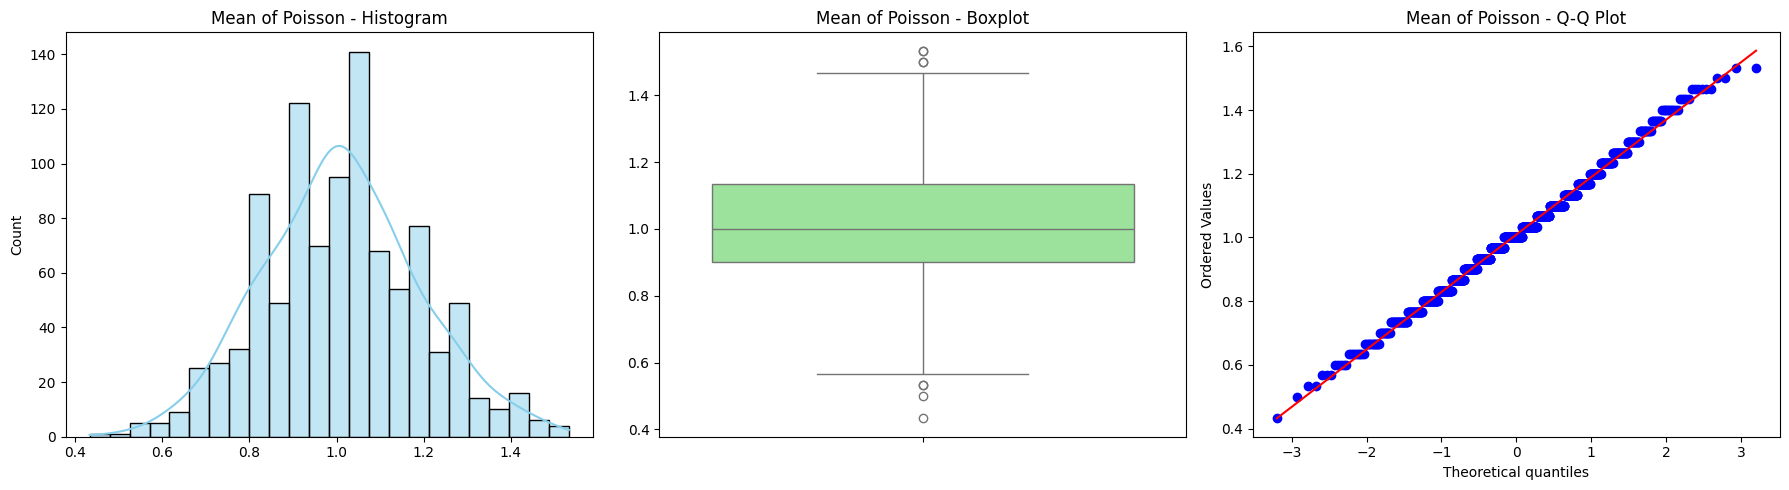

----------------------------------------
Distribution: poisson, Parameters: (25,)


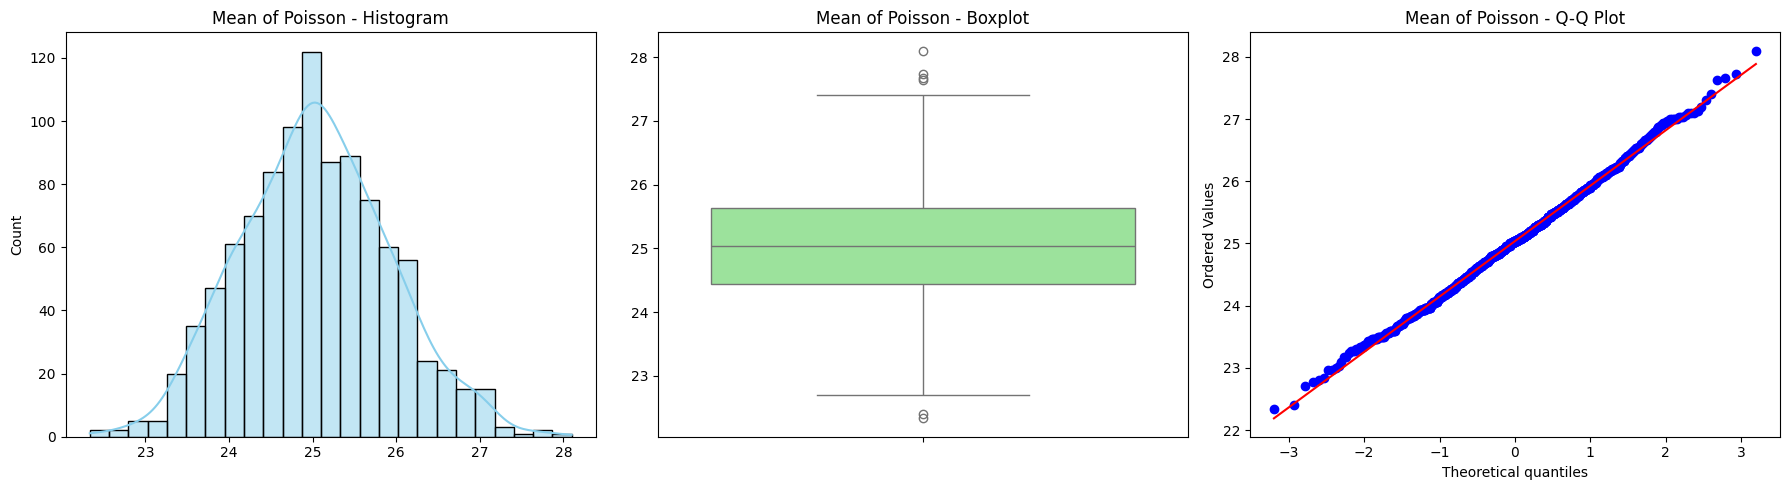

----------------------------------------
Distribution: exponential, Parameters: (0.001,)


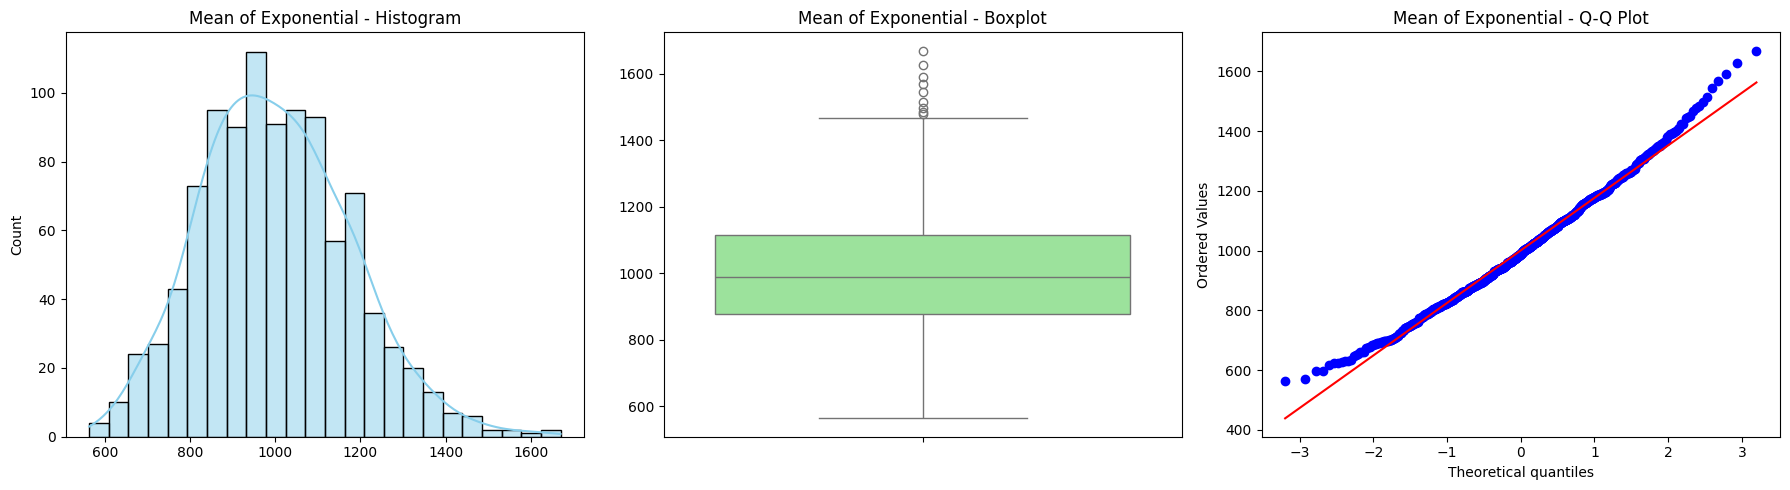

----------------------------------------
Distribution: exponential, Parameters: (1,)


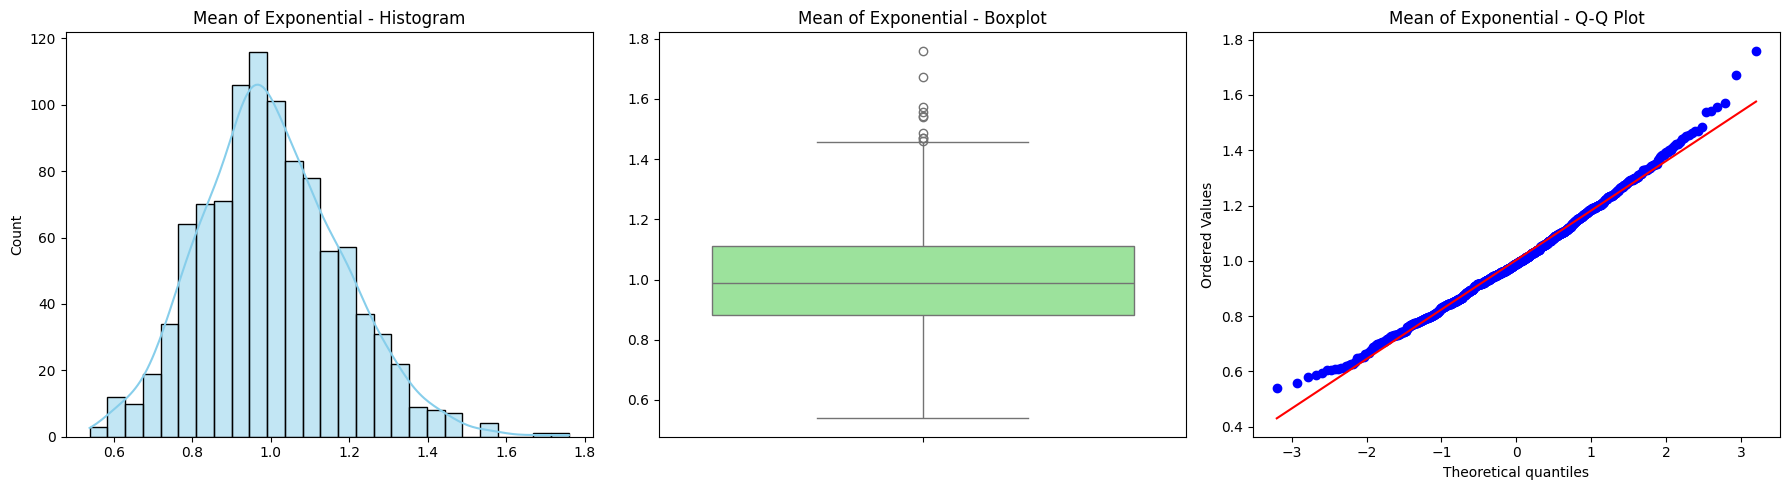

----------------------------------------
Distribution: exponential, Parameters: (25,)


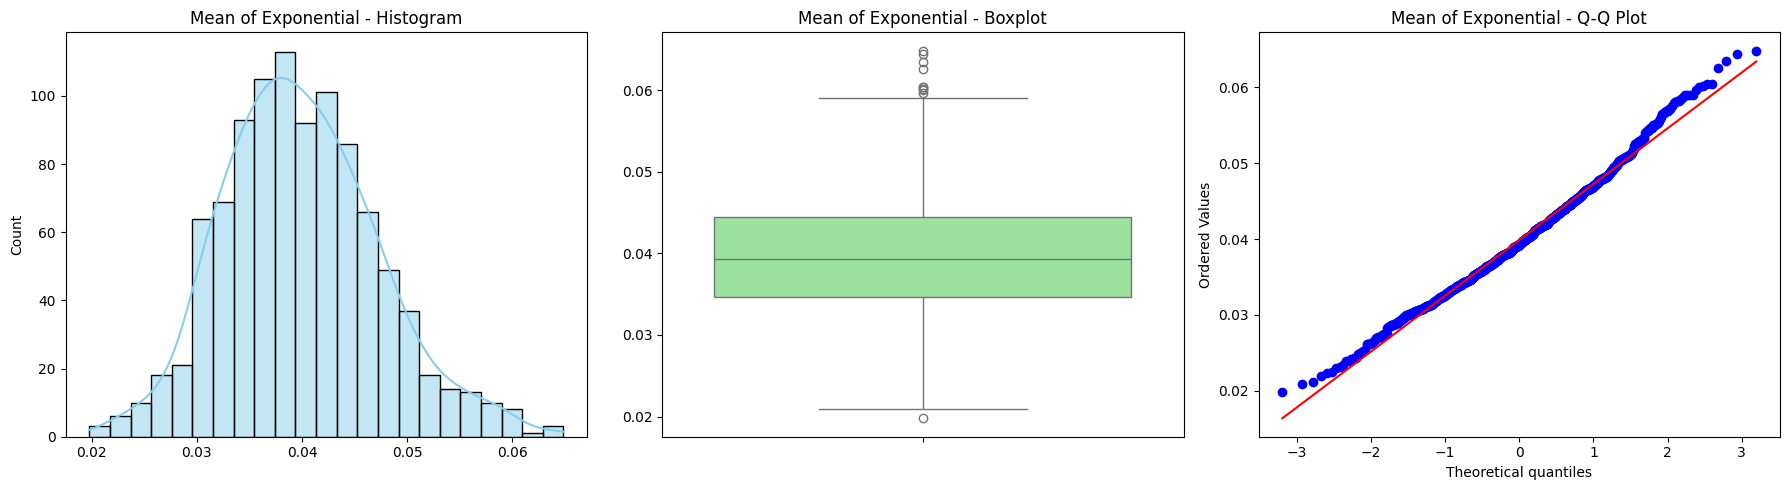

----------------------------------------
Distribution: gamma, Parameters: (0.001, 1)


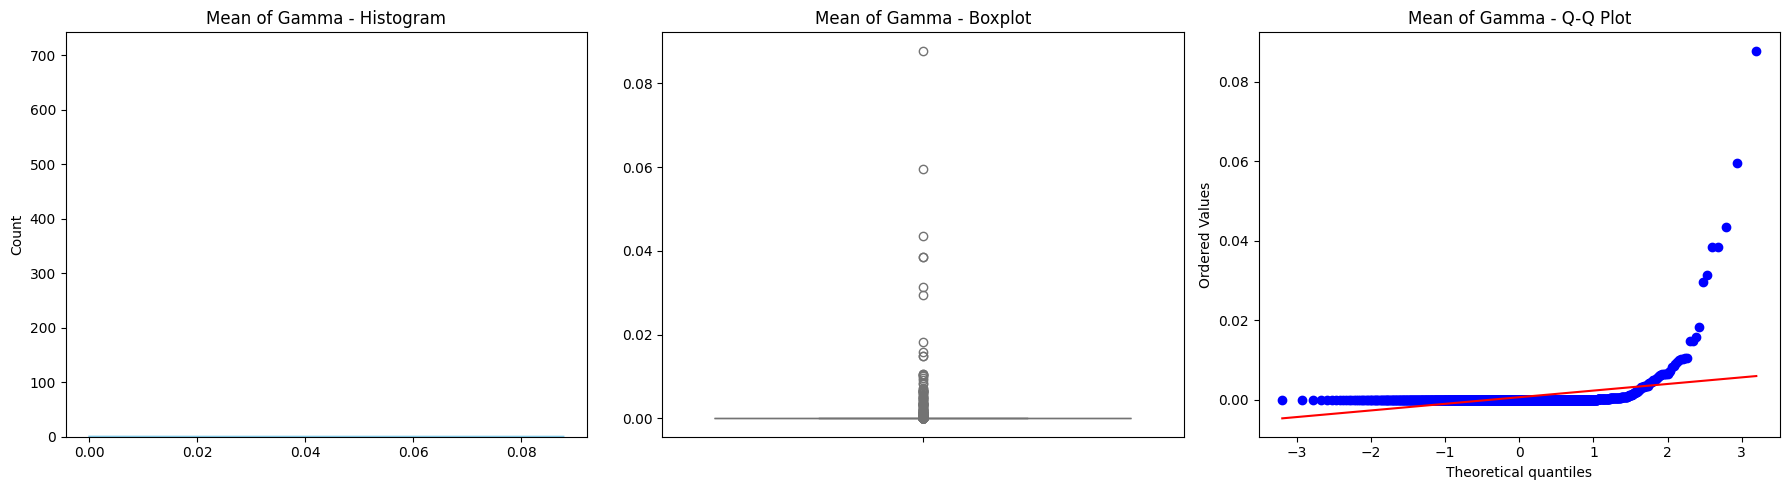

----------------------------------------
Distribution: gamma, Parameters: (2, 1)


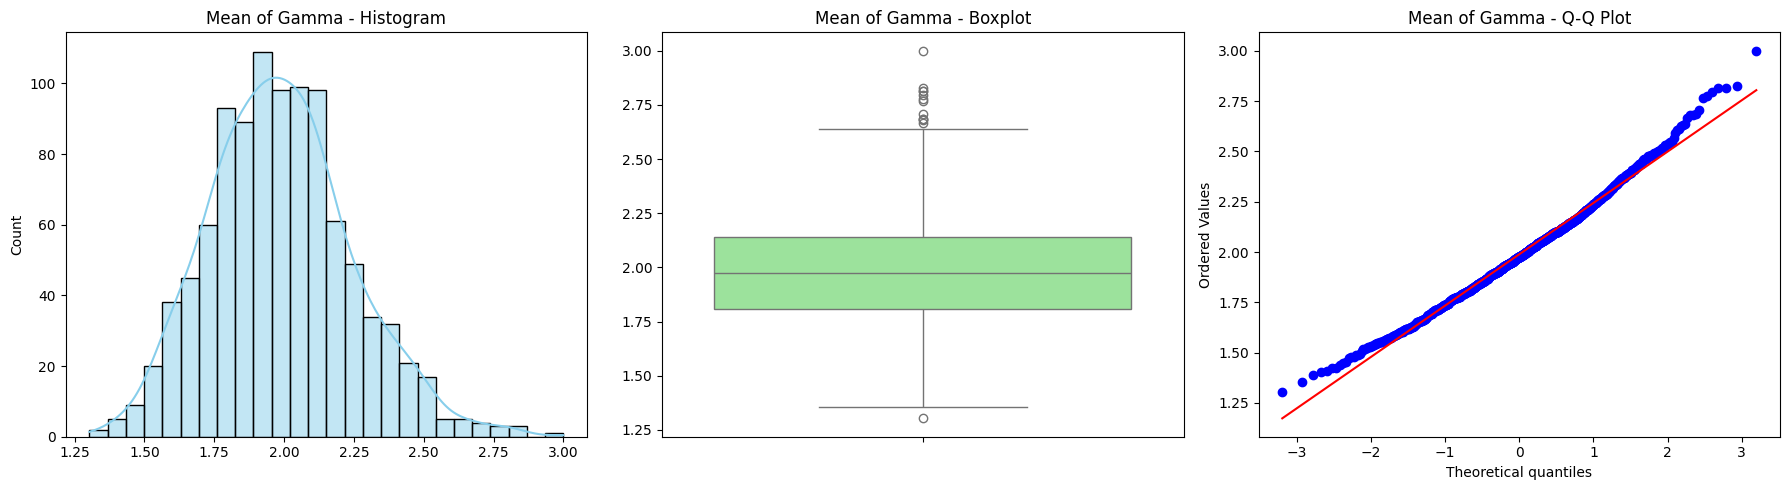

----------------------------------------
Distribution: gamma, Parameters: (30, 1)


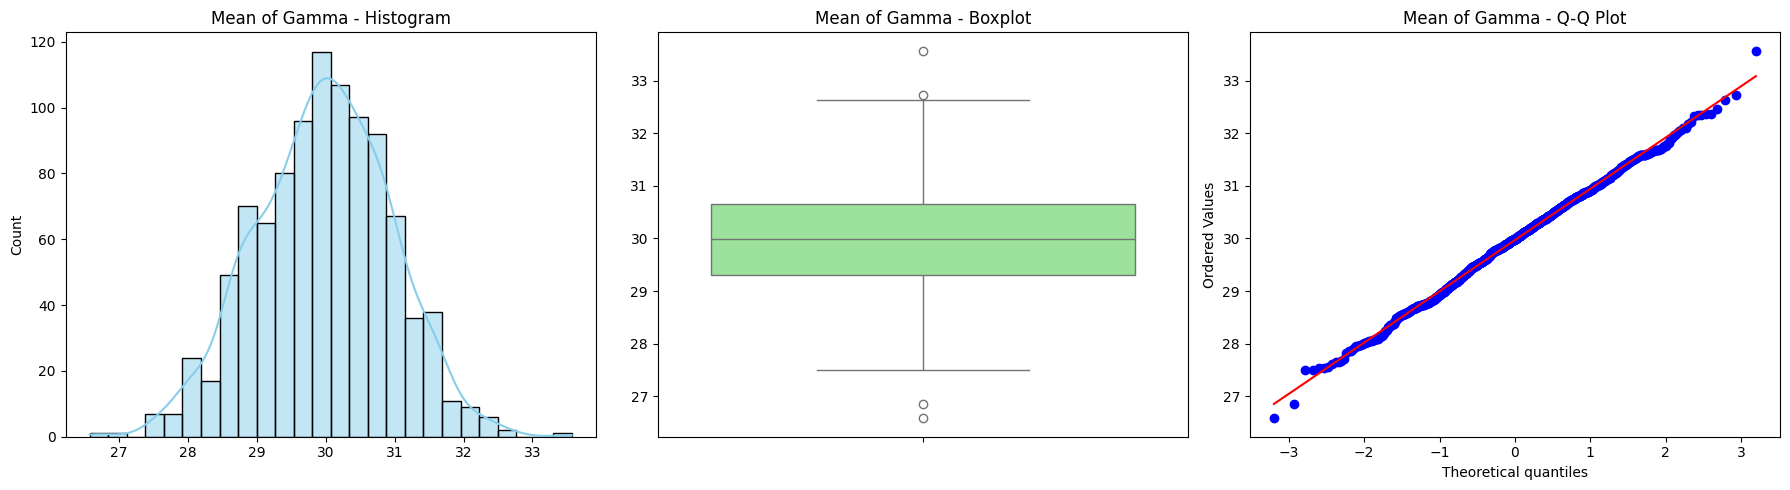

----------------------------------------
Distribution: beta, Parameters: (2, 2)


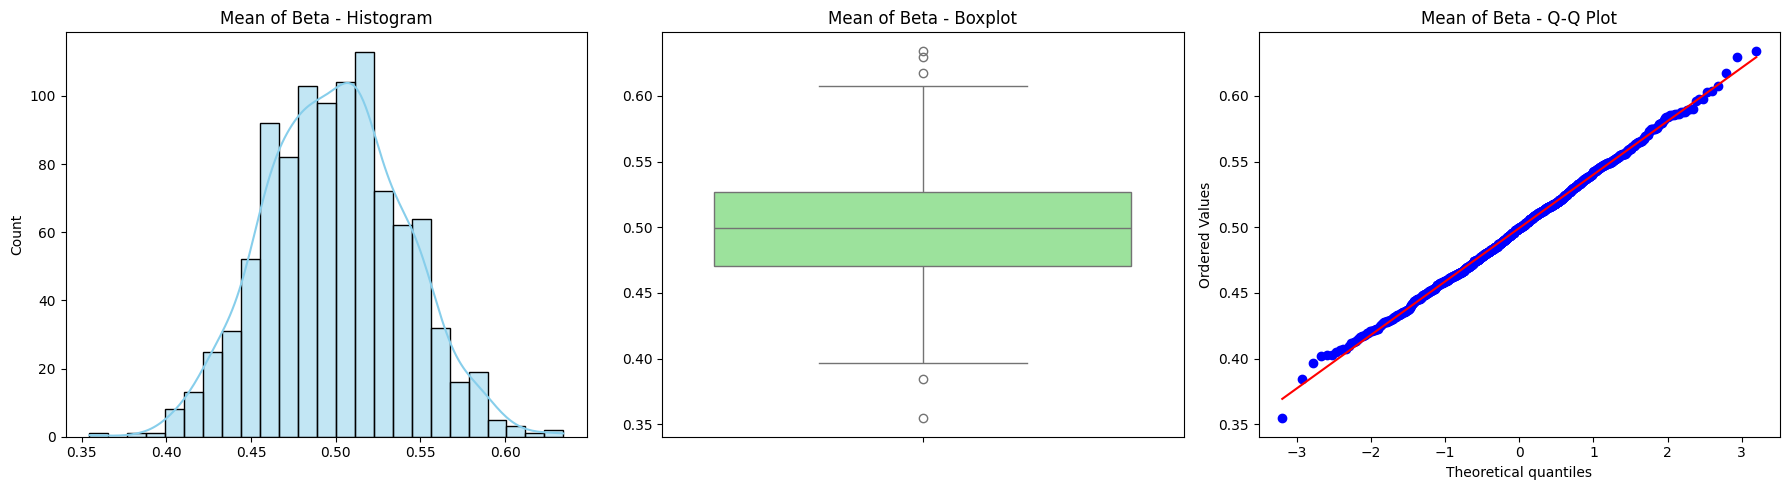

----------------------------------------
Distribution: beta, Parameters: (20, 2)


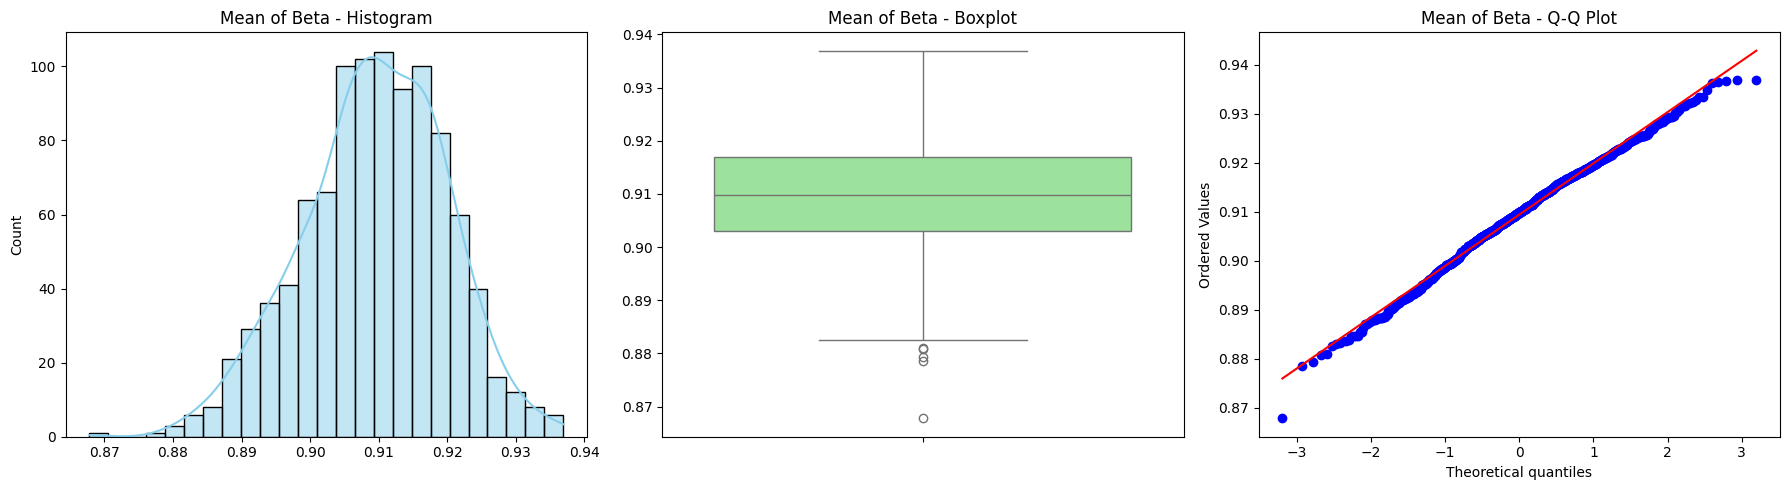

----------------------------------------
Distribution: beta, Parameters: (2, 8)


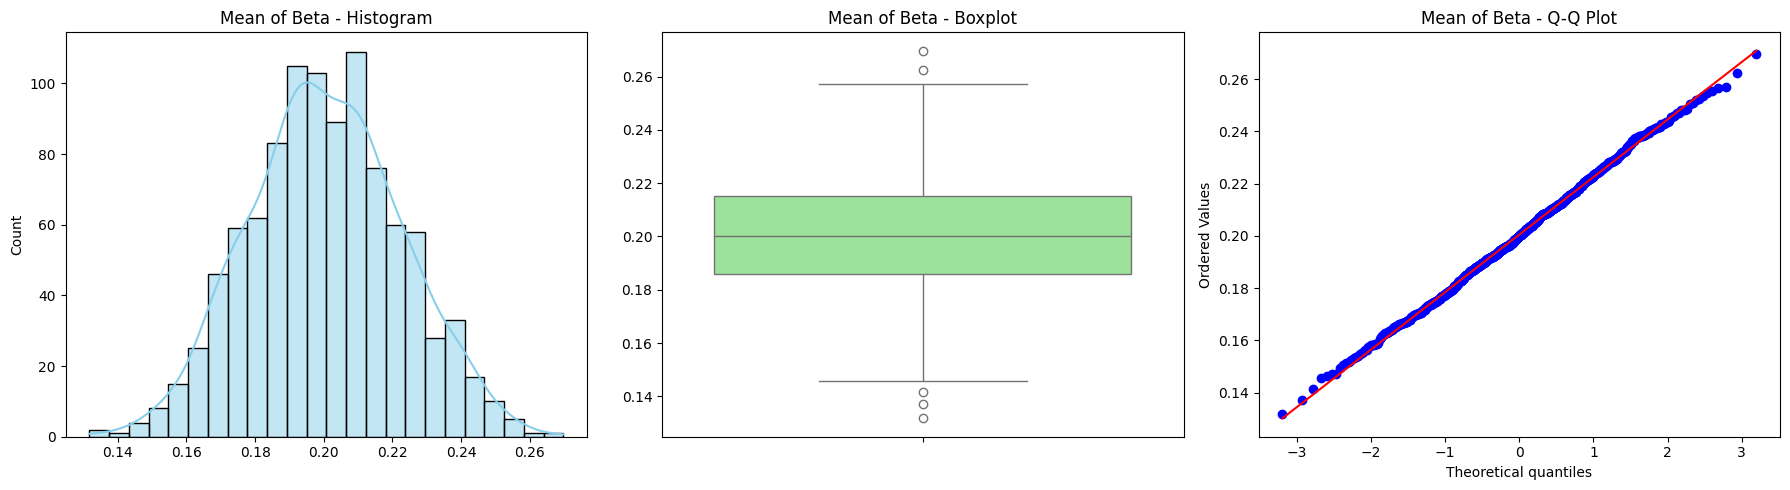

----------------------------------------
Distribution: beta, Parameters: (0.5, 0.5)


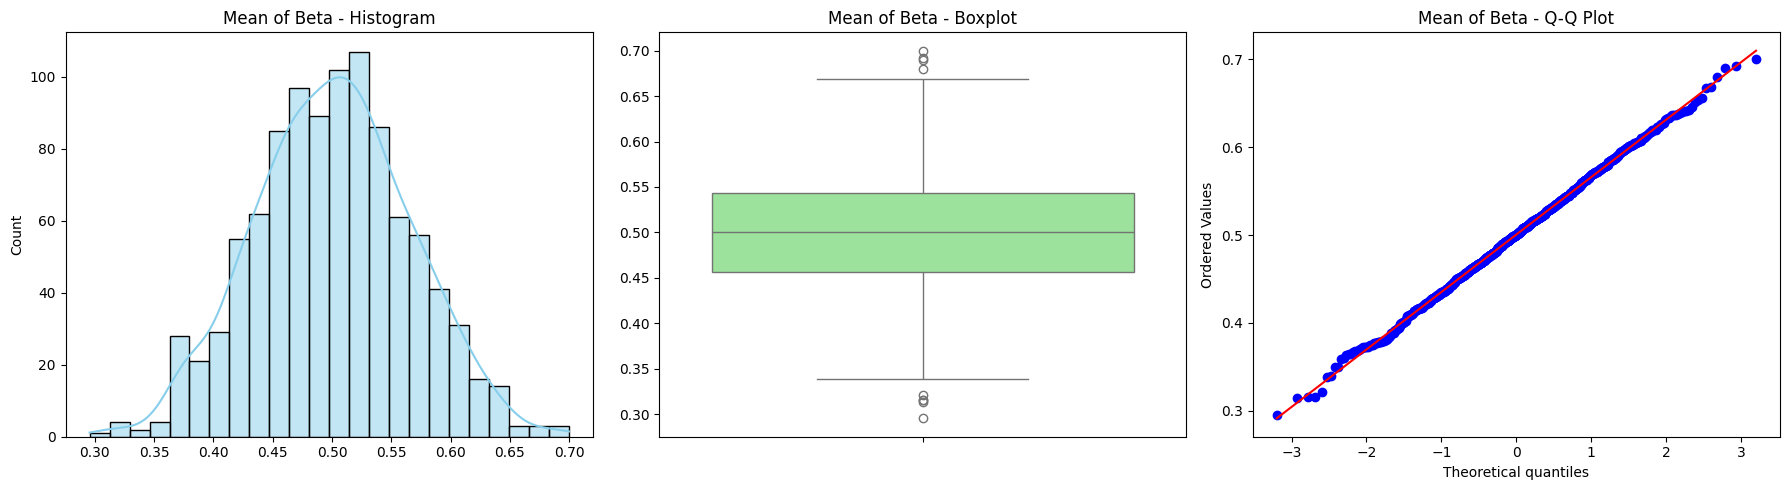

----------------------------------------
Distribution: beta, Parameters: (0.5, 0.2)


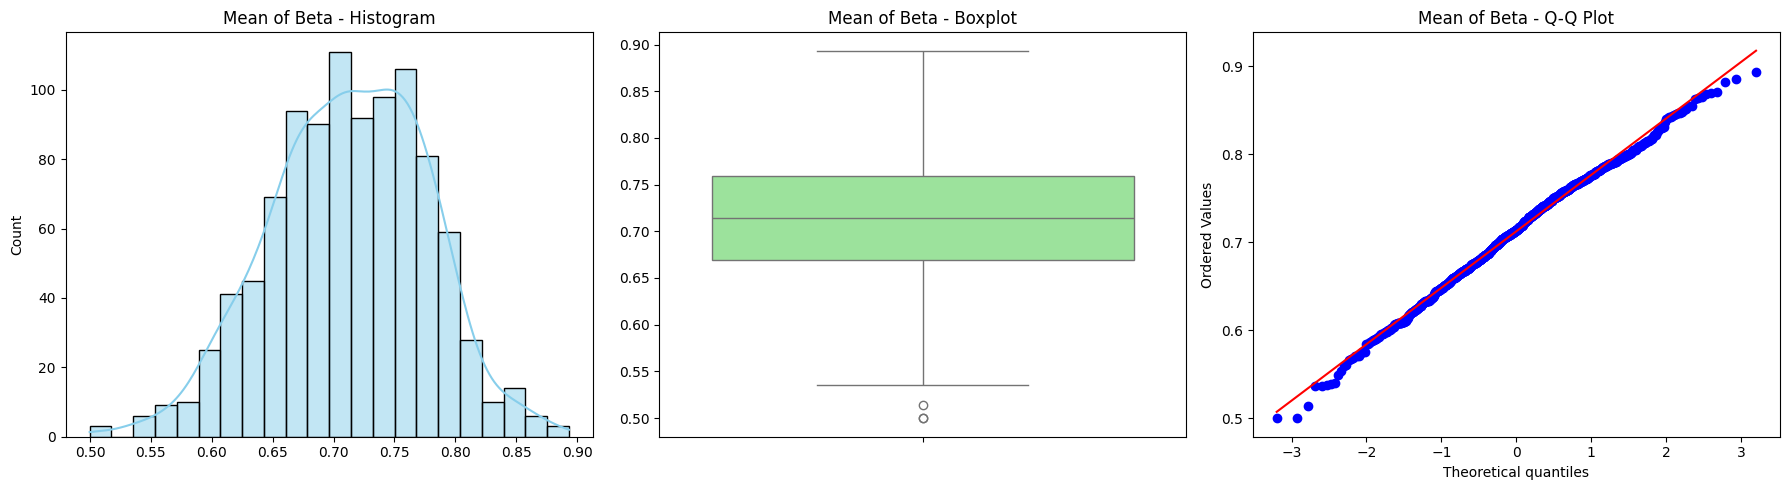

----------------------------------------
Distribution: beta, Parameters: (0.2, 5)


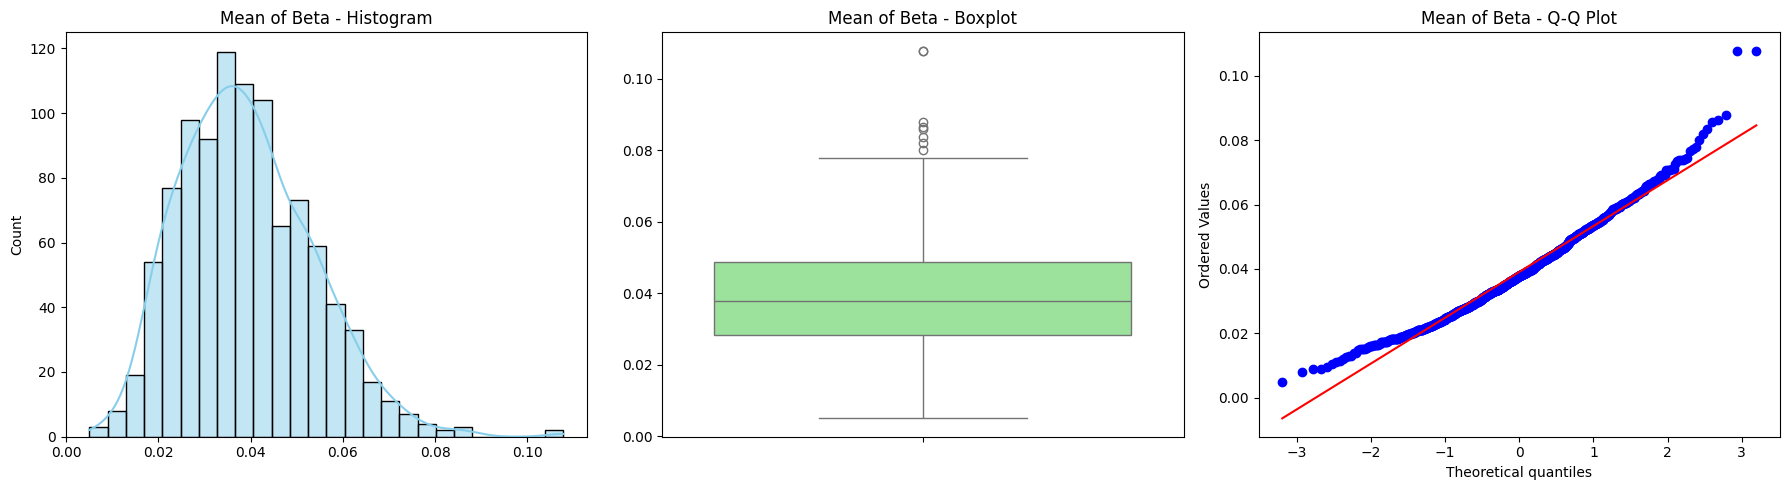

----------------------------------------
Distribution: cauchy, Parameters: (0, 1)


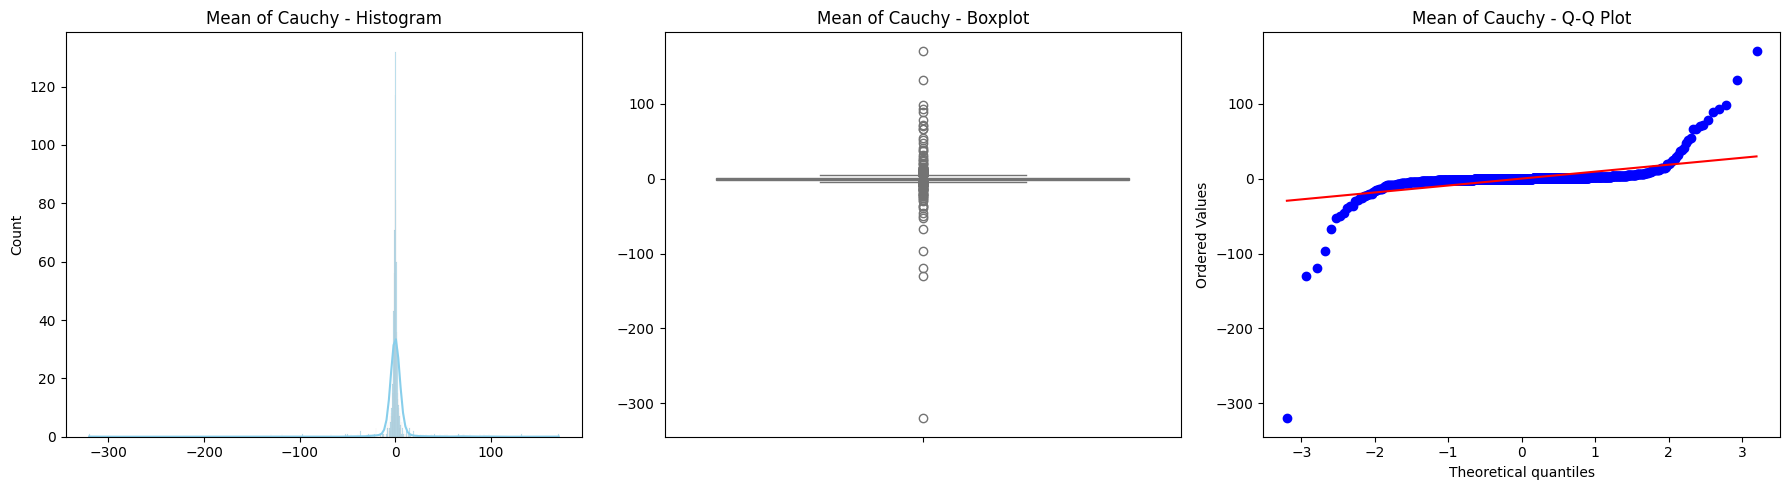

----------------------------------------
Distribution: normal, Parameters: (0, 1)


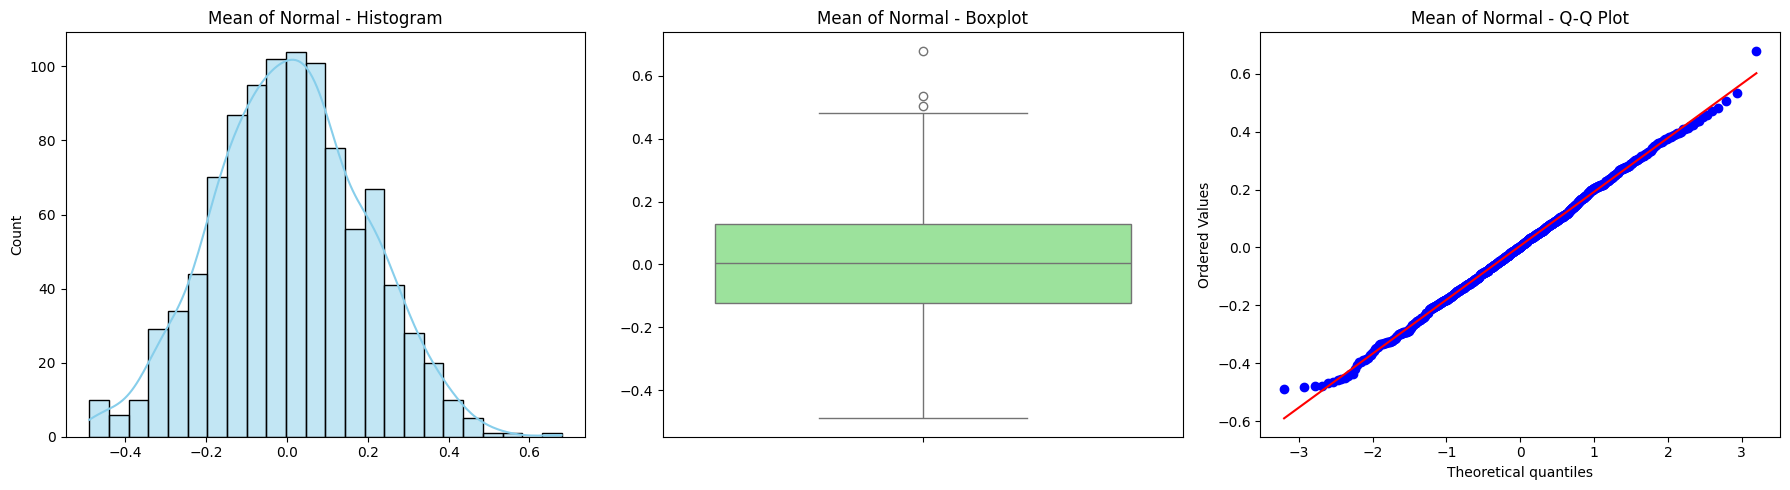

----------------------------------------


In [24]:
distributions = [
    ('uniform', (0, 1)),
    ('binomial', (12, 0.01)),
    ('binomial', (20,0.5)),
    ('binomial', (18,0.95)),
    ('poisson', (0.001,)),
    ('poisson', (1,)),
    ('poisson', (25,)),
    ('exponential', (0.001,)),
    ('exponential', (1,)),
    ('exponential', (25,)),
    ('gamma', (0.001, 1)),
    ('gamma', (2, 1)),
    ('gamma', (30, 1)),
    ('beta', (2, 2)),
    ('beta', (20, 2)),
    ('beta', (2, 8)),
    ('beta', (0.5, 0.5)),
    ('beta', (0.5, 0.2)),
    ('beta', (0.2, 5)),
    ('cauchy', (0, 1)),
    ('normal', (0, 1)),
]

n = 30
size = 1000

for dist, params in distributions:
    print(f"Distribution: {dist}, Parameters: {params}")
    samples = generate_samples(dist, params, n, size)
    statistics = compute_statistics(samples)

    # Visualize and test normality for 'mean' as an example
    visualize_distribution(statistics['mean'], f"Mean of {dist.capitalize()}")
    # result = check_normality(statistics['mean'])
    # print(result)
    print('-' * 40)


Running analysis for n = 5
Distribution: uniform, Parameters: (0, 1)


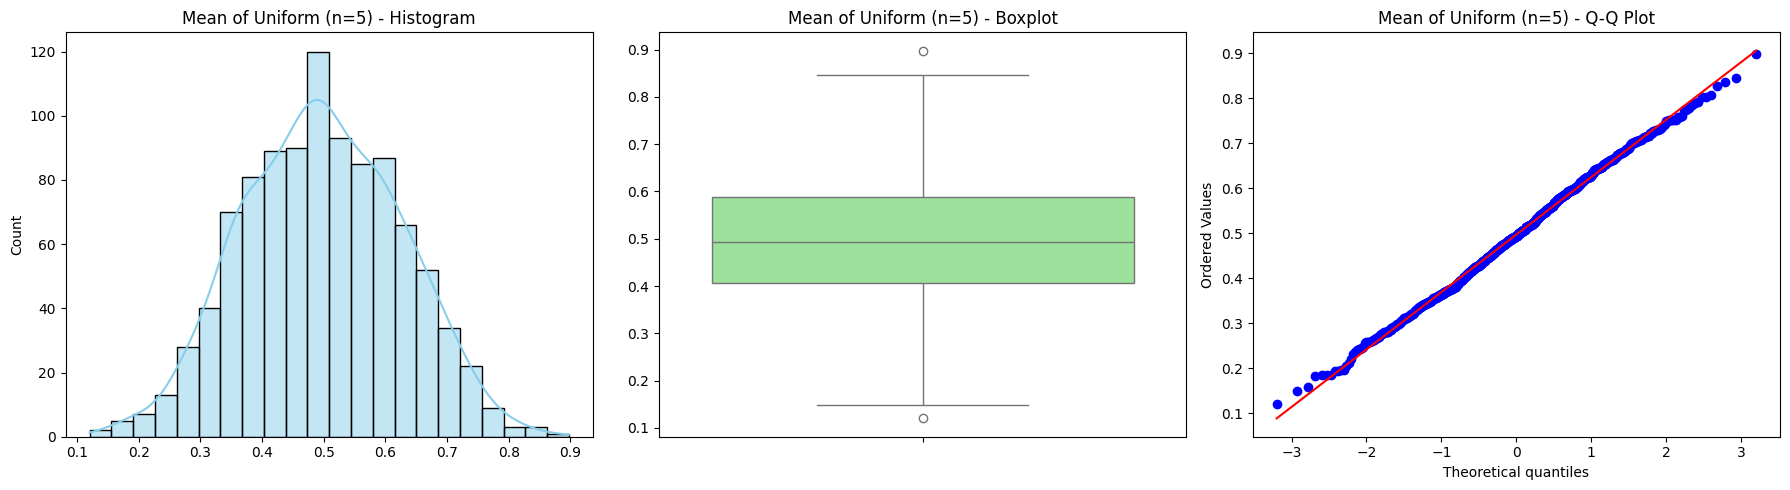

----------------------------------------
Distribution: binomial, Parameters: (12, 0.01)


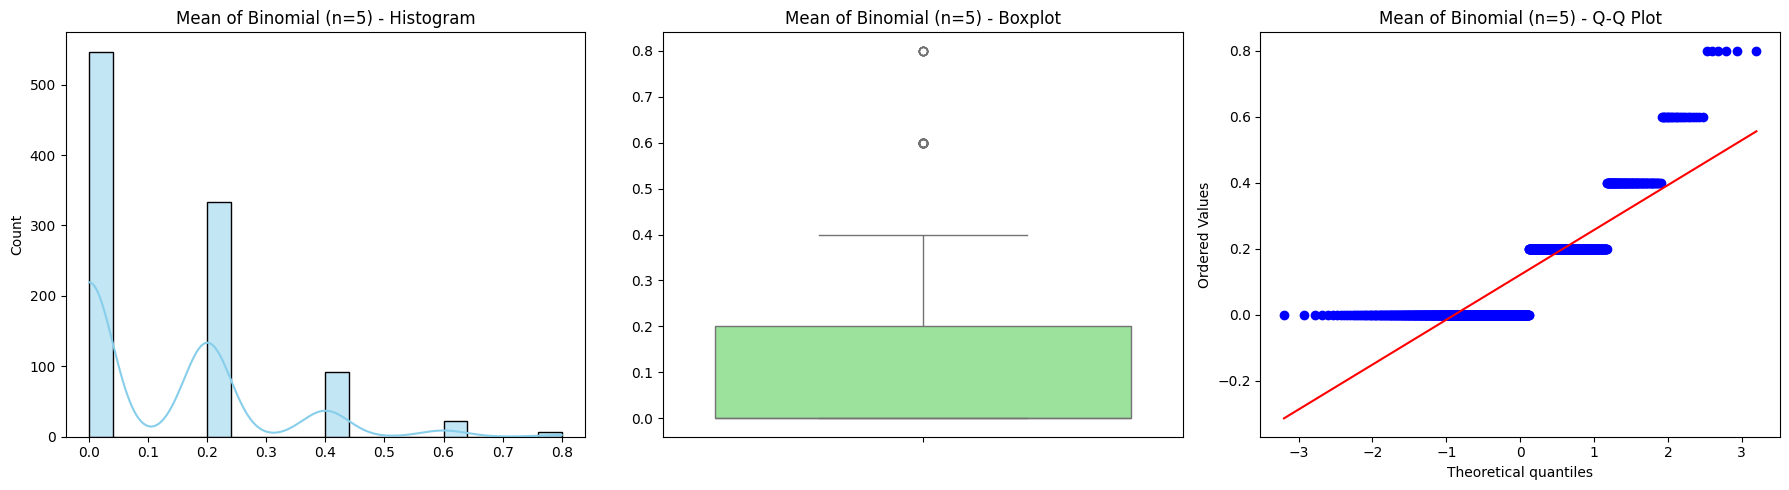

----------------------------------------
Distribution: binomial, Parameters: (20, 0.5)


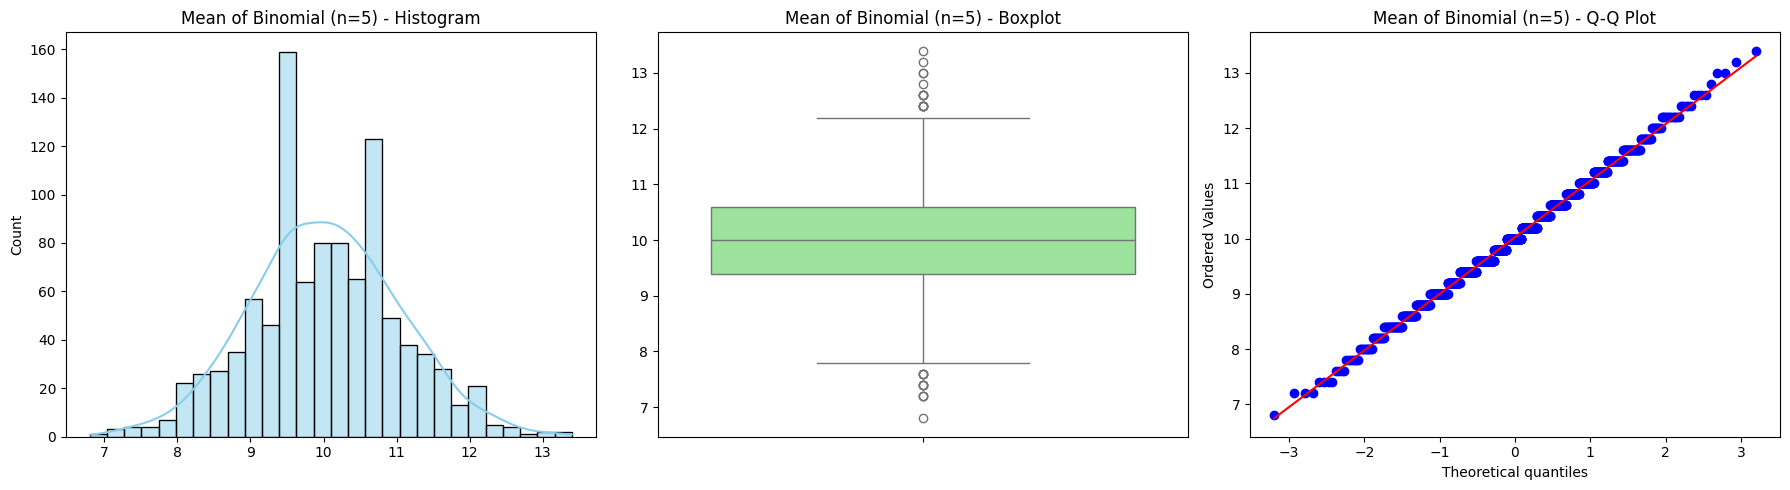

----------------------------------------
Distribution: binomial, Parameters: (18, 0.95)


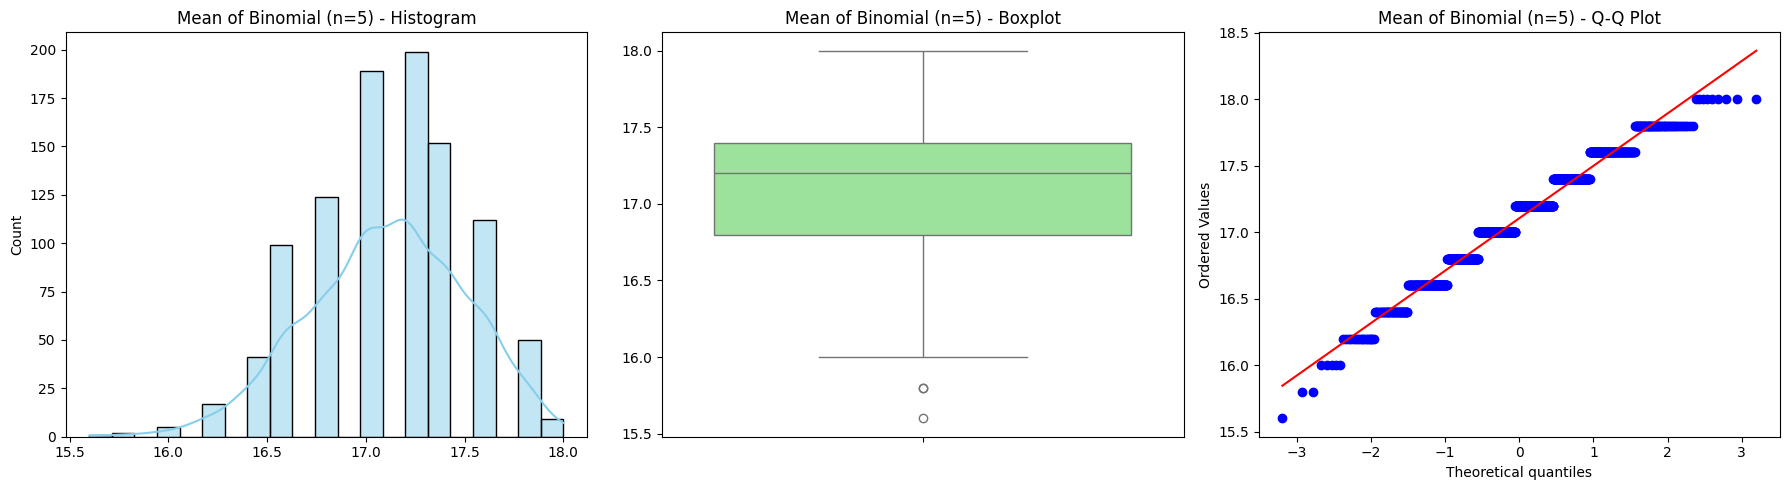

----------------------------------------
Distribution: poisson, Parameters: (0.001,)


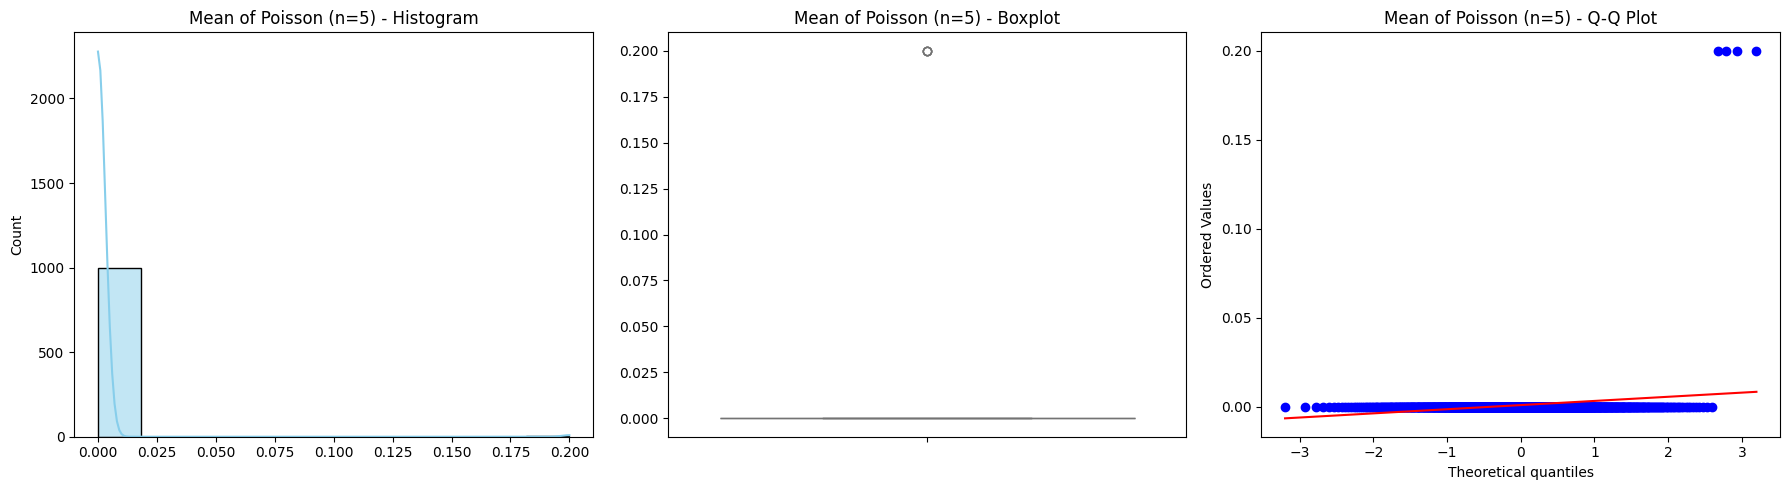

----------------------------------------
Distribution: poisson, Parameters: (1,)


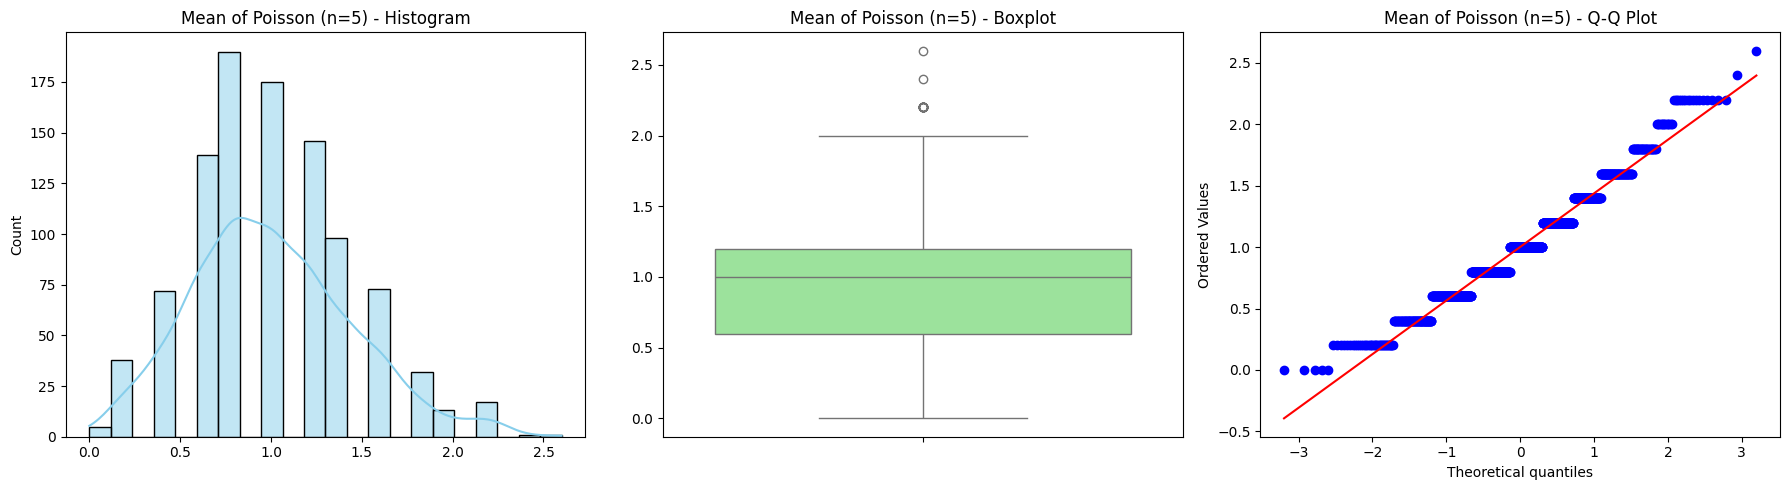

----------------------------------------
Distribution: poisson, Parameters: (25,)


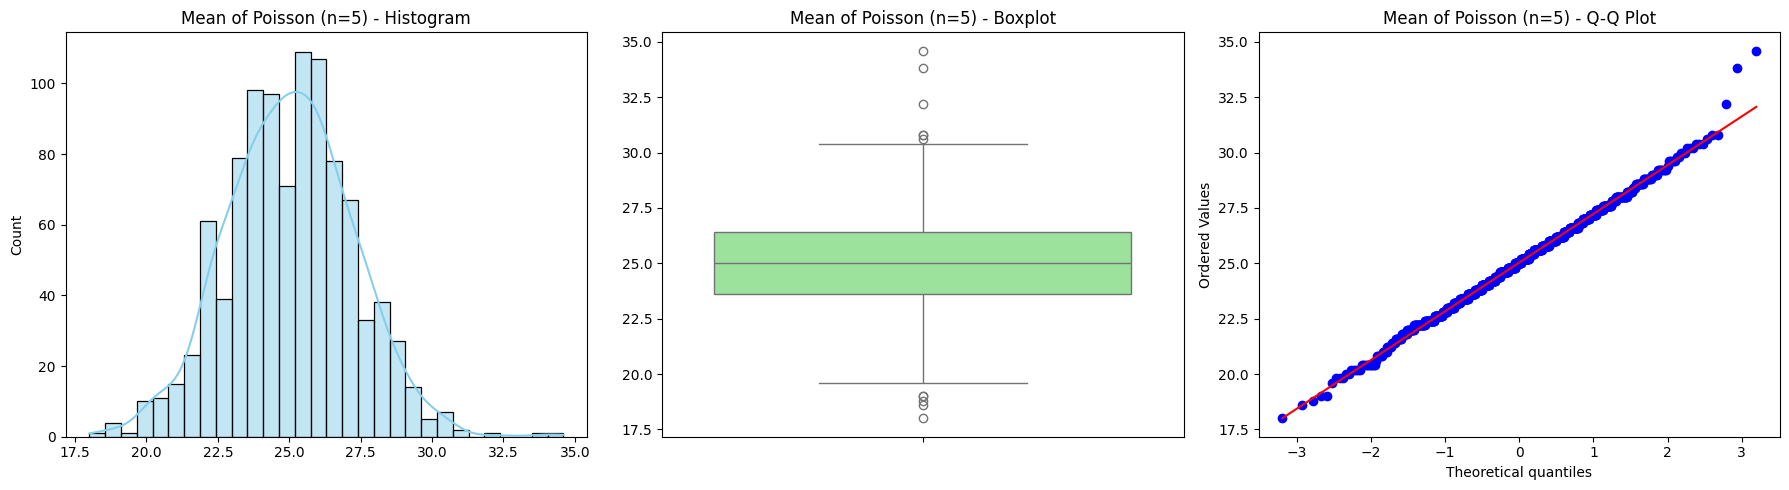

----------------------------------------
Distribution: exponential, Parameters: (0.001,)


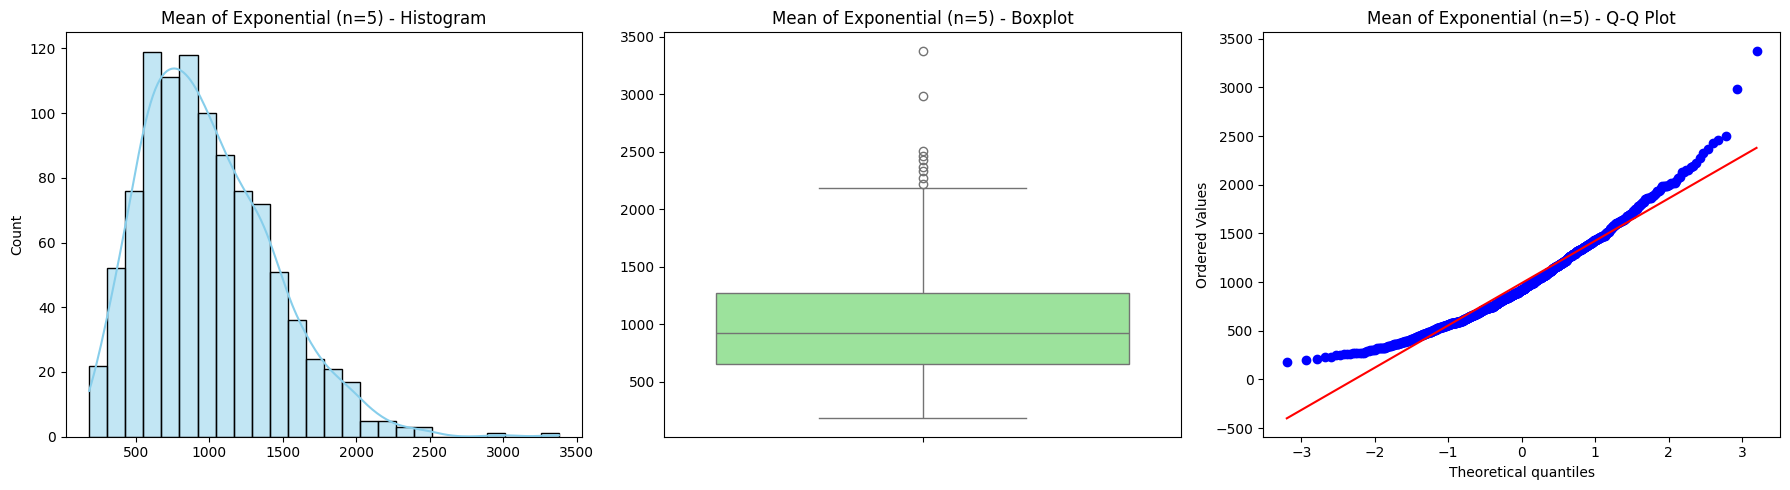

----------------------------------------
Distribution: exponential, Parameters: (1,)


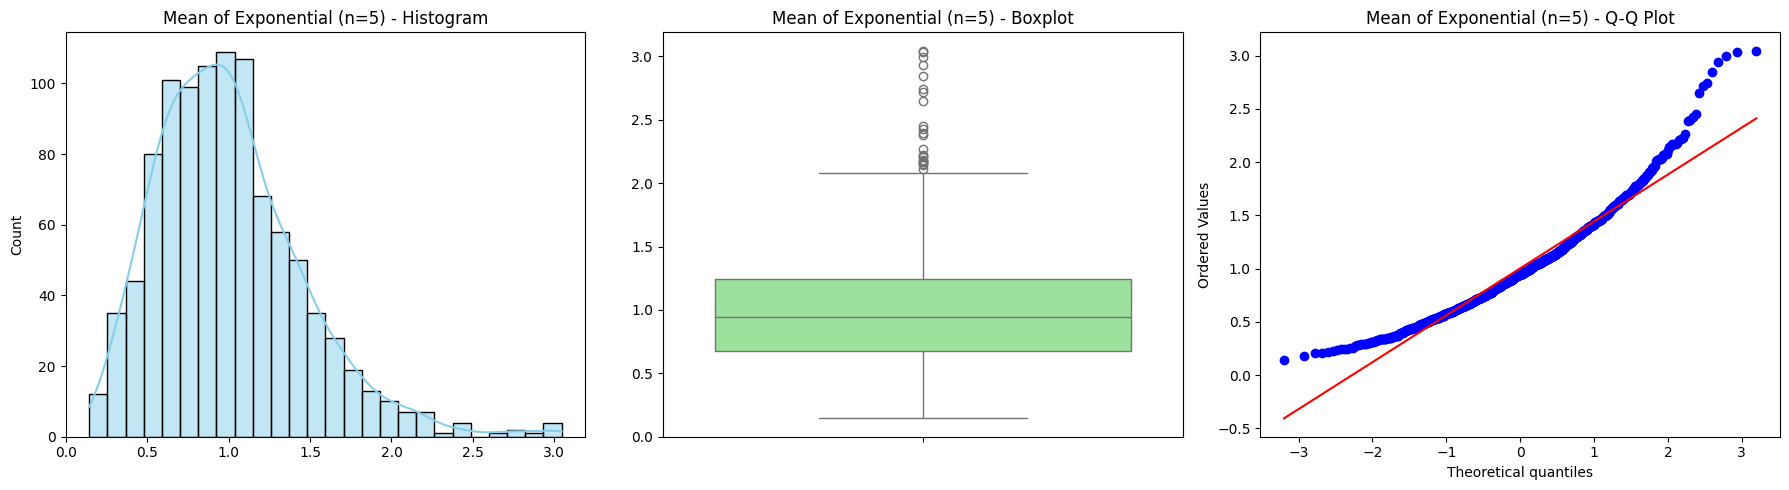

----------------------------------------
Distribution: exponential, Parameters: (25,)


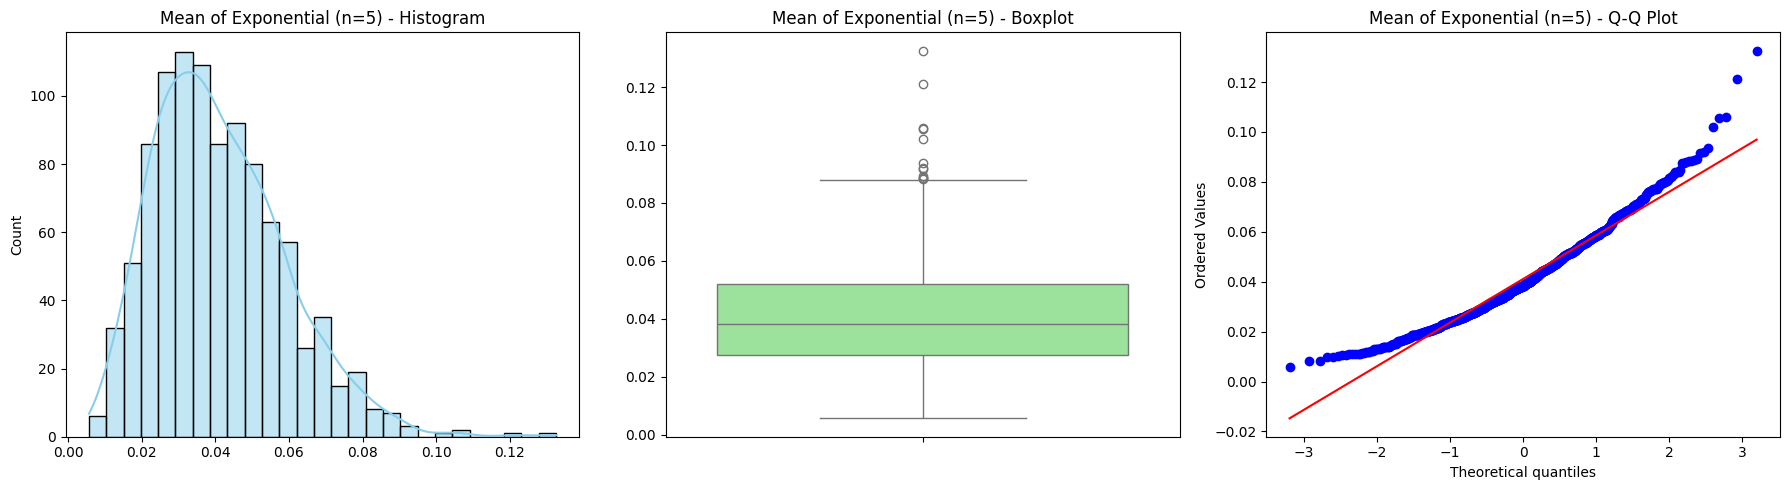

----------------------------------------
Distribution: gamma, Parameters: (0.001, 1)


ValueError: Maximum allowed size exceeded

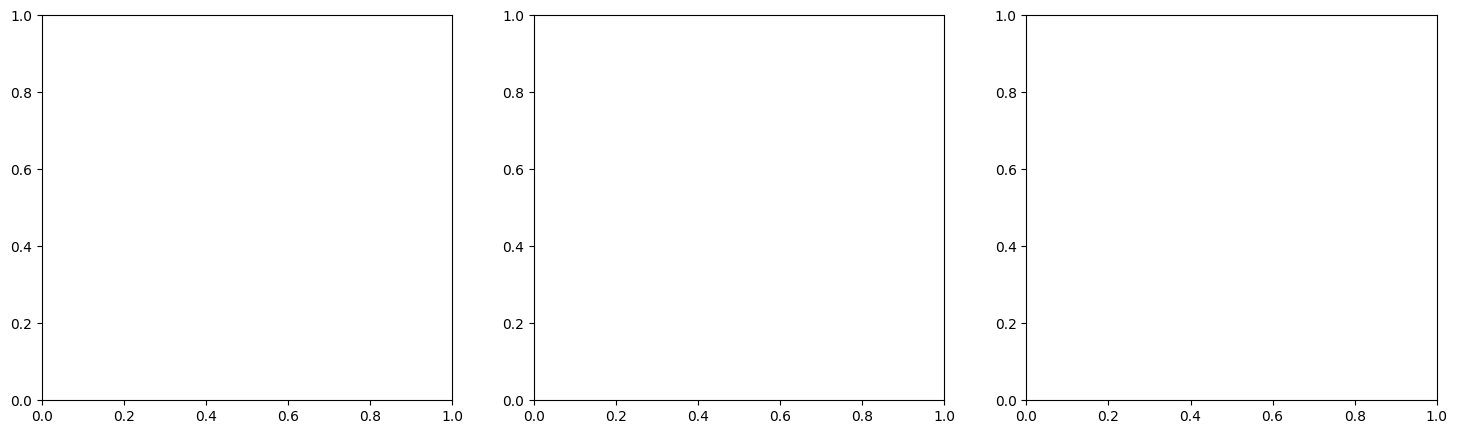

In [25]:
n_values = range(5, 105, 5)  # Loop for n values from 5 to 100 with an interval of 5
size = 1000

distributions = [
    ('uniform', (0, 1)),
    ('binomial', (12, 0.01)),
    ('binomial', (20, 0.5)),
    ('binomial', (18, 0.95)),
    ('poisson', (0.001,)),
    ('poisson', (1,)),
    ('poisson', (25,)),
    ('exponential', (0.001,)),
    ('exponential', (1,)),
    ('exponential', (25,)),
    ('gamma', (0.001, 1)),
    ('gamma', (2, 1)),
    ('gamma', (30, 1)),
    ('beta', (2, 2)),
    ('beta', (20, 2)),
    ('beta', (2, 8)),
    ('beta', (0.5, 0.5)),
    ('beta', (0.5, 0.2)),
    ('beta', (0.2, 5)),
    ('cauchy', (0, 1)),
    ('normal', (0, 1)),
]

for n in n_values:
    print(f"Running analysis for n = {n}")
    for dist, params in distributions:
        print(f"Distribution: {dist}, Parameters: {params}")
        samples = generate_samples(dist, params, n, size)
        statistics = compute_statistics(samples)

        # Visualize and test normality for 'mean' as an example
        visualize_distribution(statistics['mean'], f"Mean of {dist.capitalize()} (n={n})")
        # result = check_normality(statistics['mean'])
        # print(result)
        print('-' * 40)
